In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [3]:
from src import *

In [4]:
model, config = load_model_locally(f'020_RX100_resized_128/0', model_name='rvce')

In [5]:
files = [config.testing_files[0]]
datapool = DataPool(files, config)

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
video = datapool[next(iter(datapool.keys()))]

from_time, till_time  = video.get_from_till_time(Part.WHOLE)

sr = config.sr
audio = video.signal
events = video.events

samples, labels = create_dataset_sequentially(video, from_time=from_time, till_time=till_time)

<hr>

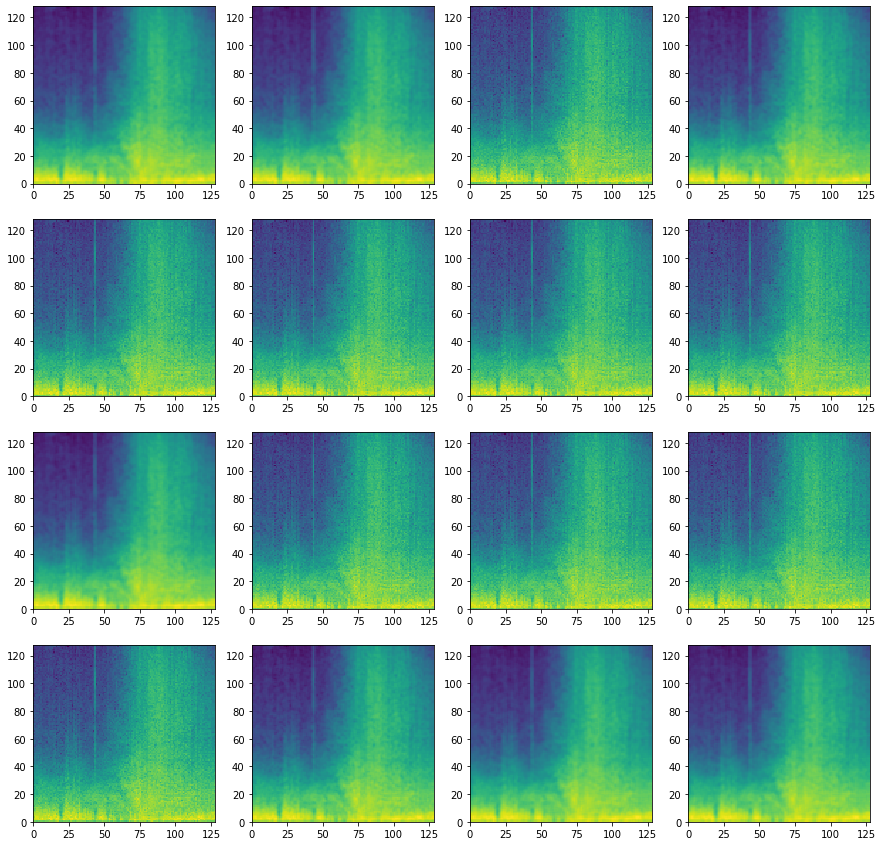

In [7]:
sample = samples[0]

config.feature_augmentation = True
config.time_mask_param = 20
config.freq_mask_param = 20
transform = create_transformation(config, True)

nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

for i in range(nrows):
    for j in range(ncols):
        features = transform(sample).squeeze()
        axes[i, j].pcolormesh(features)

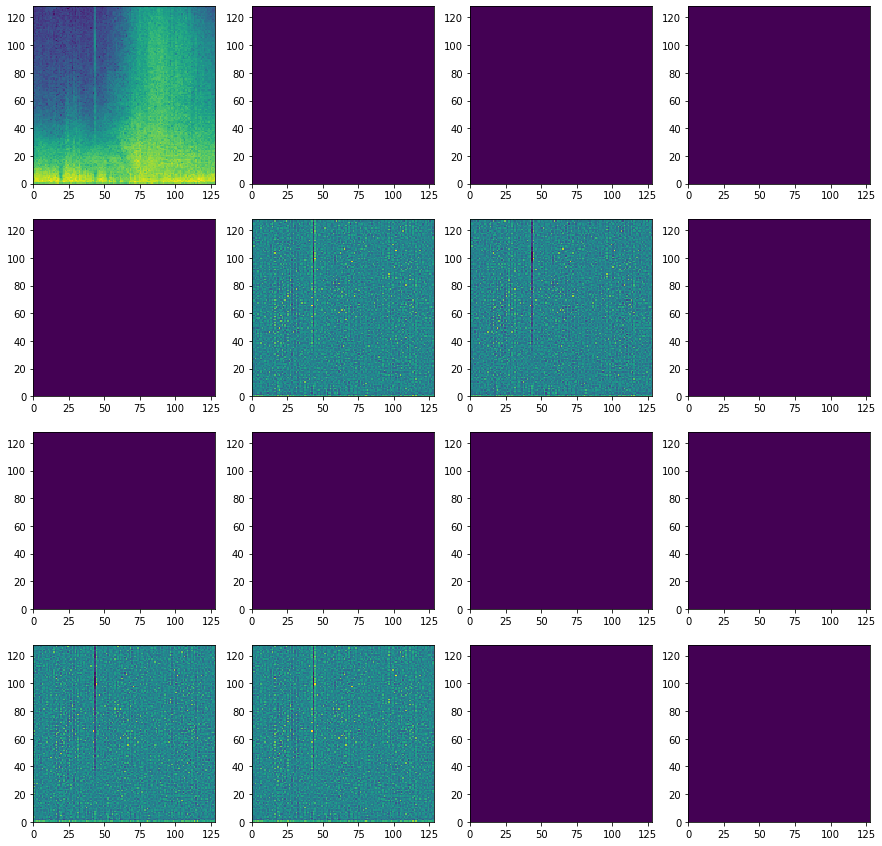

In [8]:
sample = samples[0]

config.feature_augmentation = False
config.image_augmentations = True
config.random_gaussian_blur = True
config.random_erasing = True
config.random_resized_crop = True
transform = create_transformation(config, True)

nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

reference_features = create_transformation(config, False)(sample).squeeze()

for i in range(nrows):
    for j in range(ncols):
        features = transform(sample).squeeze()
        axes[i, j].pcolormesh(features - reference_features)

axes[0, 0].pcolormesh(reference_features);

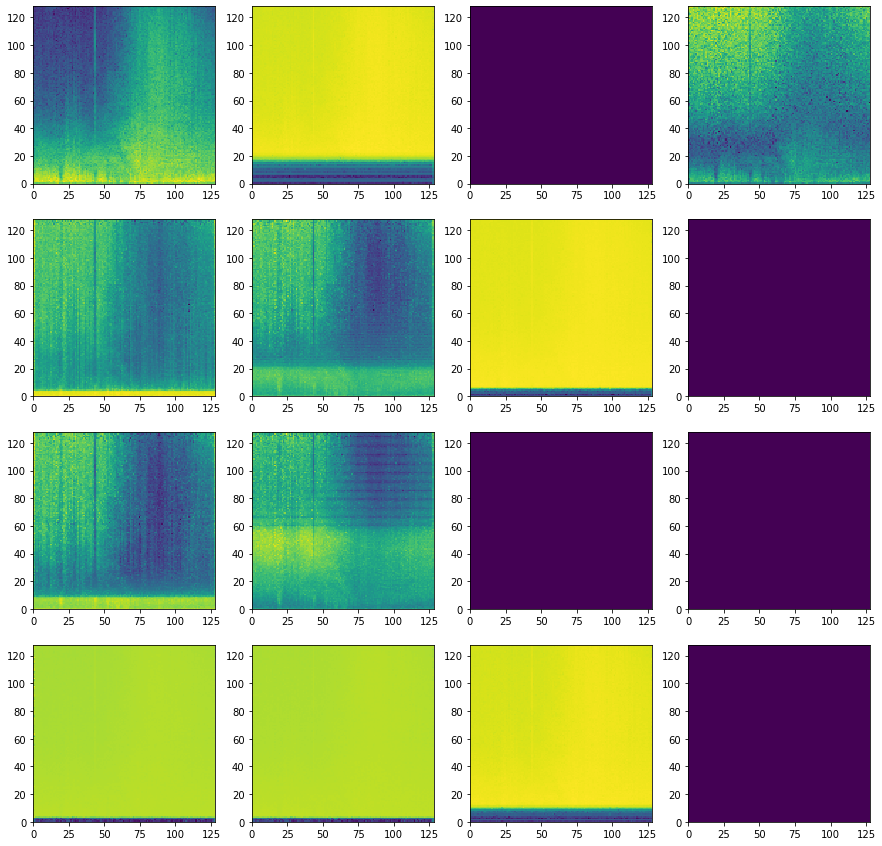

In [13]:
sample = samples[0]

config.feature_augmentation = False
config.image_augmentations = False
config.audio_augmentations = True

config.random_high_pass_filter = True
config.random_low_pass_filter = True
config.random_colored_noise = True

transform = create_transformation(config, True)

nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 15))

reference_features = create_transformation(config, False)(sample).squeeze()

for i in range(nrows):
    for j in range(ncols):
        features = transform(sample).squeeze()
        axes[i, j].pcolormesh(features - reference_features)

axes[0, 0].pcolormesh(reference_features);

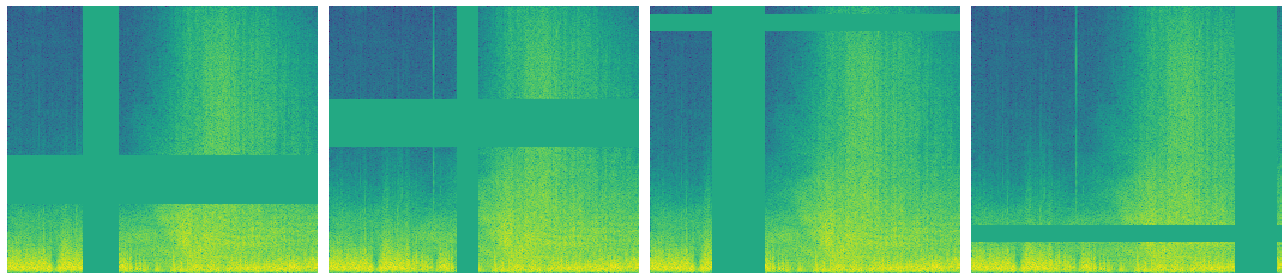

In [21]:
sample = samples[0]

config.feature_augmentation = True
config.time_mask_param = 50
config.freq_mask_param = 100
transform = create_transformation(config, True)

nrows = 1
ncols = 4
fig, ax = plt.subplots(nrows, ncols, figsize=(18, 4))

for i in range(ncols):
    features = transform(sample).squeeze()
    ax[i].axis('off')
    ax[i].pcolormesh(features)

plt.tight_layout()
plt.savefig('plots/feature_masking.png')

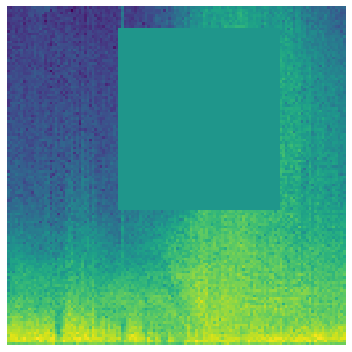

In [30]:
sample = samples[0]

def save_features_plot(features, name):
    plt.subplots(figsize=(5, 5))
    plt.axis('off')
    plt.pcolormesh(features)
    plt.tight_layout()
    plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=300)

config.feature_augmentation = True
config.image_augmentations = False

config.time_mask_param = 20
config.freq_mask_param = 20
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/augmentations/feature_masking.png')

config.feature_augmentation = False
config.image_augmentations = True

config.random_erasing = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/augmentations/random_erasing.png')
config.random_erasing = False

config.random_gaussian_blur = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/augmentations/random_gaussian_blur.png')
config.random_gaussian_blur = False

config.random_resized_crop = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
# save_features_plot(features, 'plots/augmentations/random_resized_crop.png')
config.random_resized_crop = False

config.image_augmentations = False

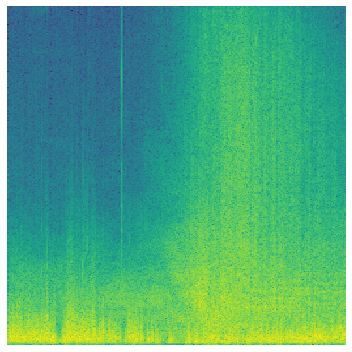

In [11]:
sample = samples[0]

config = Config()

def show_features(features):
    plt.subplots(figsize=(5, 5))
    plt.axis('off')
    plt.pcolormesh(features)
    plt.tight_layout()

config.audio_augmentations = True
config.random_high_pass_filter = True
transform = create_transformation(config, True)
features = transform(sample).squeeze()
show_features(features)

Different sampling rates

In [26]:
def save_features(features, name):
    plt.subplots(figsize=(5, 5))
    plt.axis('off')
    plt.pcolormesh(features)
    plt.tight_layout()
    plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=300)


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

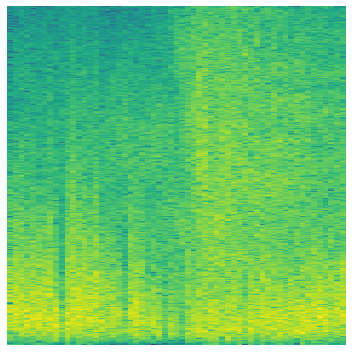

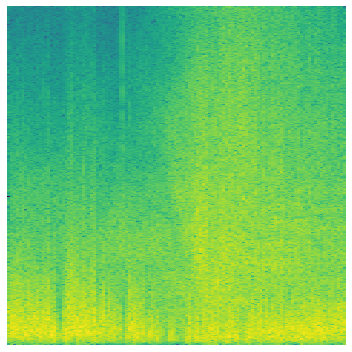

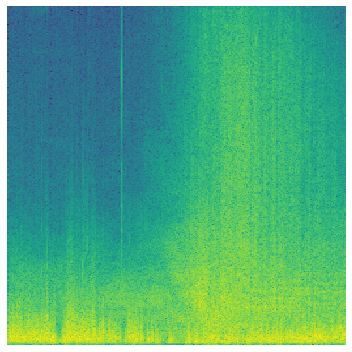

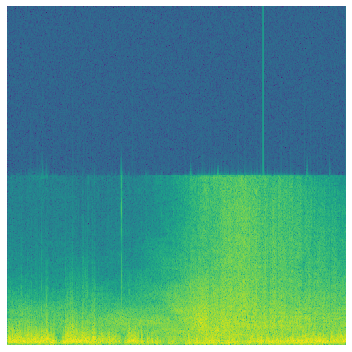

In [27]:
model, config = load_model_locally(f'017_eyedea_RX100_sr_5000/0', model_name='rvce')

for sr in [5000, 10000, 22050, 44100]:
    config.sr = sr

    files = [config.testing_files[0]]
    datapool = DataPool(files, config)
    
    video = datapool[next(iter(datapool.keys()))]

    audio = video.signal
    events = video.events

    samples, labels = create_dataset_sequentially(video)

    transform = create_transformation(config)

    features = transform(samples[0]).squeeze()

    save_features(features, f'plots/sampling_rates/sampling_rate_{sr}.png')

Different resize sizes

In [31]:
def save_features(features, name):
    plt.subplots(figsize=(5, 5))
    plt.axis('off')
    plt.pcolormesh(features)
    plt.tight_layout()
    plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=300)

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

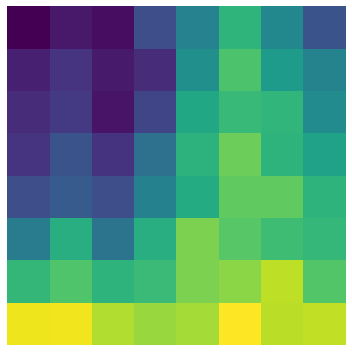

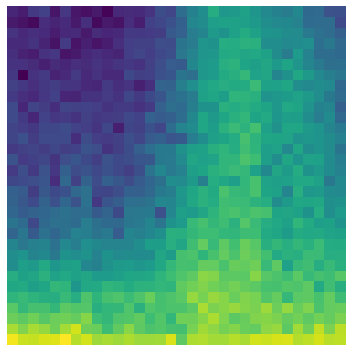

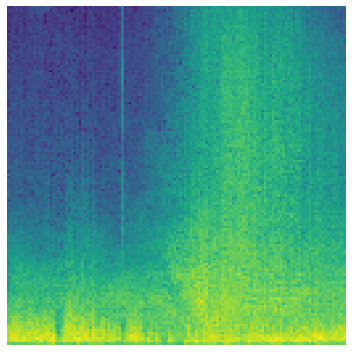

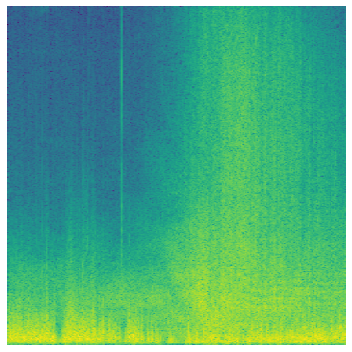

In [36]:
model, config = load_model_locally(f'020_RX100_resized_8/0', model_name='rvce')

for resize_size in [(8,8), (32,32), (128, 128), (513, 431)]:
    config.resize_size = resize_size

    files = [config.testing_files[0]]
    datapool = DataPool(files, config)
    
    video = datapool[next(iter(datapool.keys()))]

    audio = video.signal
    events = video.events

    samples, labels = create_dataset_sequentially(video)

    transform = create_transformation(config)

    features = transform(samples[0]).squeeze()

    save_features(features, f'plots/resize_sizes/resize_sizes_{resize_size[0]}_{resize_size[1]}.png')

Mel spectrogram vs Spectrogram

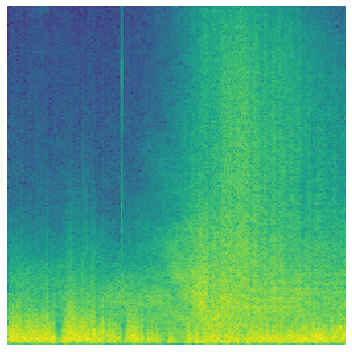

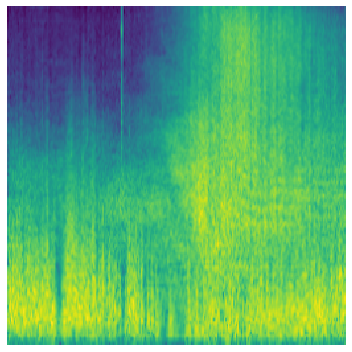

In [8]:
sample = samples[0]

def save_features_plot(features, name):
    plt.subplots(figsize=(5, 5))
    plt.axis('off')
    plt.pcolormesh(features)
    plt.tight_layout()
    plt.savefig(name, bbox_inches='tight', pad_inches=0, dpi=300)

config.resize_size = (256, 256)

config.transformation = Transformation.STFT
transform = create_transformation(config)
features = transform(sample).squeeze()
save_features_plot(features, 'plots/spectrogram.png')

config.transformation = Transformation.MEL
transform = create_transformation(config)
features = transform(sample).squeeze()
save_features_plot(features, 'plots/mel_spectrogram.png')